# Customer Segmentation Using ML

Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.

In [46]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Loading Data
customer_data = pd.read_csv('/Users/sachin/Downloads/Python_Projects/Mall_Customers.csv')
customer_data.info()
customer_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
customer_data.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Customer Gender Visualization

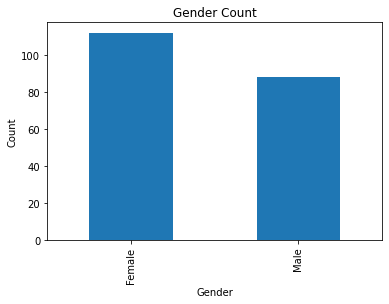

In [13]:
customer_data['Genre'].value_counts().plot.bar()
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From the above Bar plot it is clear that we have more female distribution compared to male

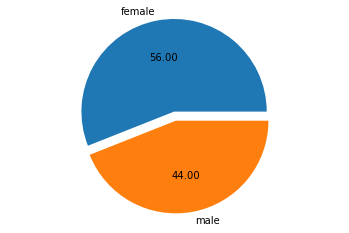

In [30]:
# Pie Chart
explode=(0,0.1)  # Can be used for multiple segements 
plt.pie(customer_data['Genre'].value_counts(), labels=['female','male'], autopct='%.2f', explode=explode)
plt.axis('equal')
plt.show()

In [22]:
print('Total Female Customer % is '+ str(customer_data['Genre'].value_counts()[0]/ sum(customer_data['Genre'].value_counts())*100) ) 

Total Female Customer % is 56.00000000000001


Customer Age Visualization

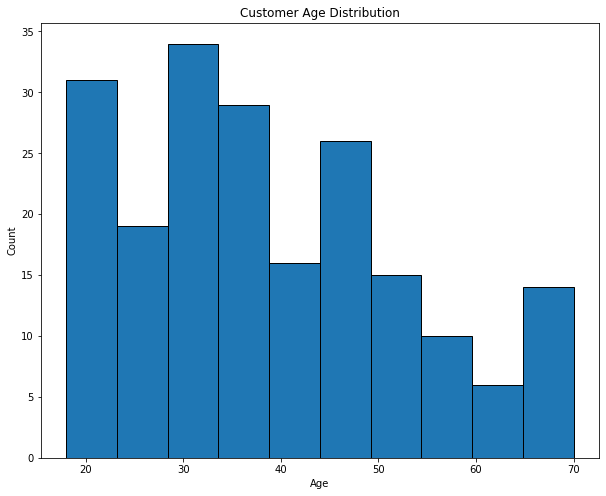

In [32]:
plt.figure(figsize=(10,8))
plt.hist(customer_data['Age'],edgecolor='Black',label=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

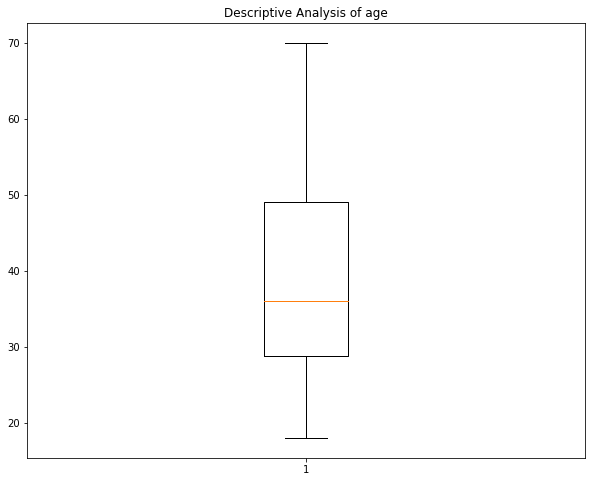

In [35]:
plt.figure(figsize=(10,8))
plt.boxplot(customer_data['Age'])
plt.title('Descriptive Analysis of age')
plt.show()

From the above boxplot we can conclude that maximum age distribution is between 30-50

Analysis of Annual Income

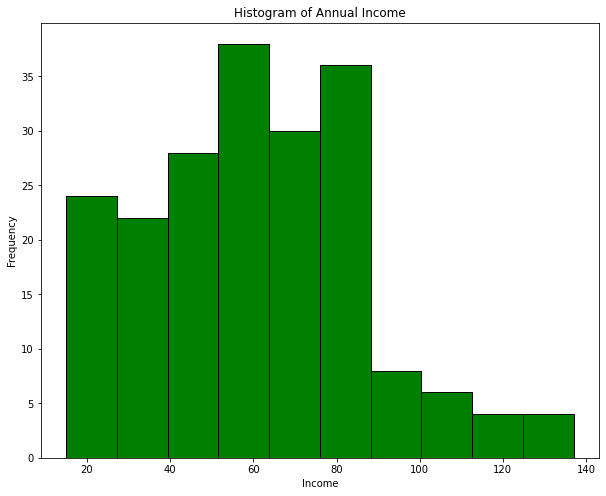

In [40]:
plt.figure(figsize=(10,8))
plt.hist(customer_data['Annual Income (k$)'], facecolor='Green', edgecolor='Black' )
plt.title('Histogram of Annual Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


Density plot of Annual Income

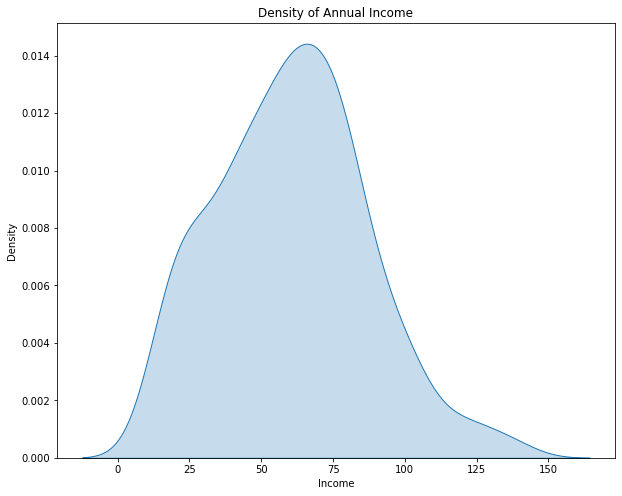

In [43]:
plt.figure(figsize=(10,8))
sns.kdeplot(customer_data['Annual Income (k$)'], fill=True)
plt.title('Density of Annual Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

Analyzing Spending Score of Customer

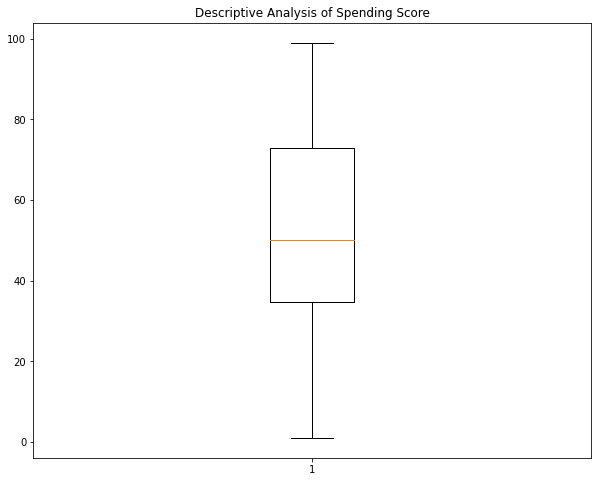

In [44]:
plt.figure(figsize=(10,8))
plt.boxplot(customer_data['Spending Score (1-100)'])
plt.title('Descriptive Analysis of Spending Score')
plt.show()

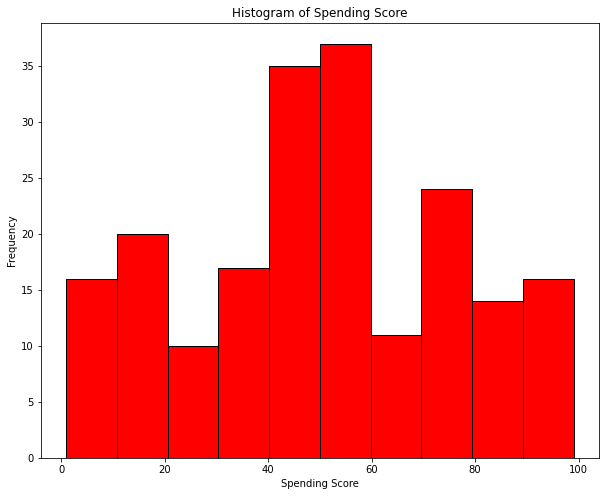

In [45]:
plt.figure(figsize=(10,8))
plt.hist(customer_data['Spending Score (1-100)'], facecolor='Red', edgecolor='Black' )
plt.title('Histogram of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

# K-Means Algorithm

In [48]:
# Scaling Data Set
scalar = MinMaxScaler()
customer_data['Age']=scalar.fit_transform(customer_data[['Age']])
customer_data['Annual Income (k$)']=scalar.fit_transform(customer_data[['Annual Income (k$)']])
customer_data['Spending Score (1-100)']=scalar.fit_transform(customer_data[['Spending Score (1-100)']])
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918
196,197,Female,0.519231,0.909836,0.275510
197,198,Male,0.269231,0.909836,0.744898
198,199,Male,0.269231,1.000000,0.173469


In [49]:
# Elbow method to find optimal number of clusters i.e. K
k_range = range(1,10)
sse=[]
for k in k_range:
    cluster = KMeans(n_clusters=k)
    cluster.fit(customer_data[['Age', 'Annual Income (k$)','Spending Score (1-100)']])
    sse.append(cluster.inertia_)  

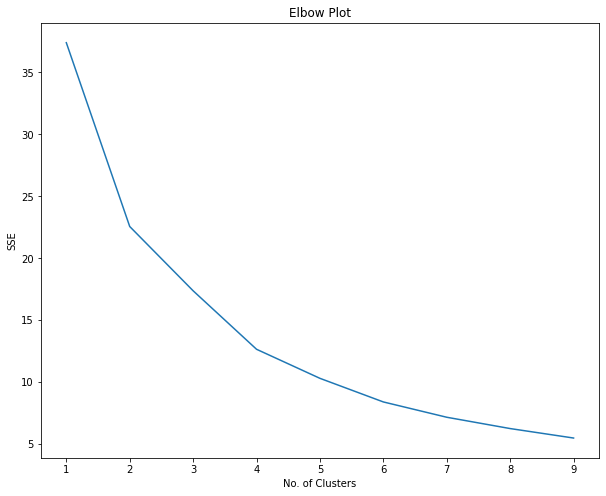

In [52]:
plt.figure(figsize=(10,8))
plt.plot(k_range, sse)
plt.title('Elbow Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE')
plt.show()

In [53]:
# Predicting clusters using K=6 from above elbow plot
km = KMeans(n_clusters=6)
y_pred = km.fit_predict(customer_data[['Age', 'Annual Income (k$)','Spending Score (1-100)']])
customer_data['clusters'] = y_pred

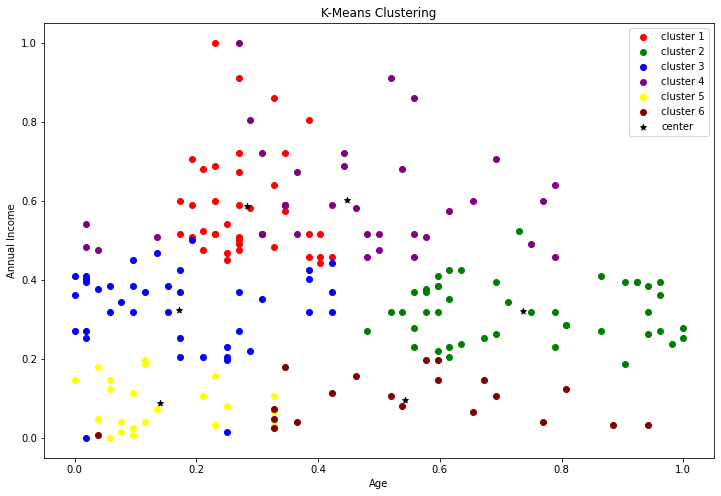

In [80]:
df1 = customer_data[customer_data['clusters']==0]
df2 = customer_data[customer_data['clusters']==1]
df3 = customer_data[customer_data['clusters']==2]
df4 = customer_data[customer_data['clusters']==3]
df5 = customer_data[customer_data['clusters']==4]
df6 = customer_data[customer_data['clusters']==5]

plt.figure(figsize=(12,8))
plt.scatter(df1.Age, df1['Annual Income (k$)'], color='Red', label='cluster 1')
plt.scatter(df2.Age, df2['Annual Income (k$)'], color='Green', label='cluster 2')
plt.scatter(df3.Age, df3['Annual Income (k$)'], color='Blue', label='cluster 3')
plt.scatter(df4.Age, df4['Annual Income (k$)'], color='purple', label='cluster 4')
plt.scatter(df5.Age, df5['Annual Income (k$)'], color='yellow', label='cluster 5')
plt.scatter(df6.Age, df6['Annual Income (k$)'], color='maroon', label='cluster 6')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='center')
plt.title('K-Means Clustering')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

# SilohuetteMethod

In [70]:
import sklearn.metrics as metrics
df_short=customer_data[['Age', 'Annual Income (k$)','Spending Score (1-100)']]
for i in range(3,10):
    labels = KMeans(n_clusters=i, init='k-means++',random_state=200).fit(df_short).labels_
    print('Silohuette score for k-clusters: '+str(i)+"is"
          +str(metrics.silhouette_score(df_short,labels, metric='euclidean', sample_size=1000, random_state=200)))
    

Silohuette score for k-clusters: 3is0.36504262943838
Silohuette score for k-clusters: 4is0.39231920205572196
Silohuette score for k-clusters: 5is0.4061174330707818
Silohuette score for k-clusters: 6is0.4234860620777653
Silohuette score for k-clusters: 7is0.42180092366487865
Silohuette score for k-clusters: 8is0.4175466595435093
Silohuette score for k-clusters: 9is0.4272146865982526


As it can be seen silohuette score for 6 clusters is the highest

# Heirarchical clustering

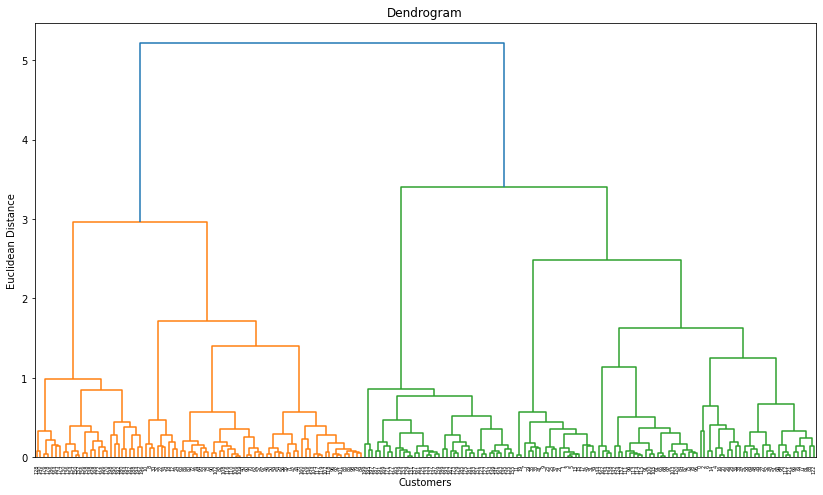

In [73]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,8))

dendogram = sch.dendrogram(sch.linkage(customer_data[['Age', 'Annual Income (k$)','Spending Score (1-100)']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
customer_data['hierarchical_cluster']=cluster.fit_predict(customer_data[['Age', 'Annual Income (k$)','Spending Score (1-100)']])

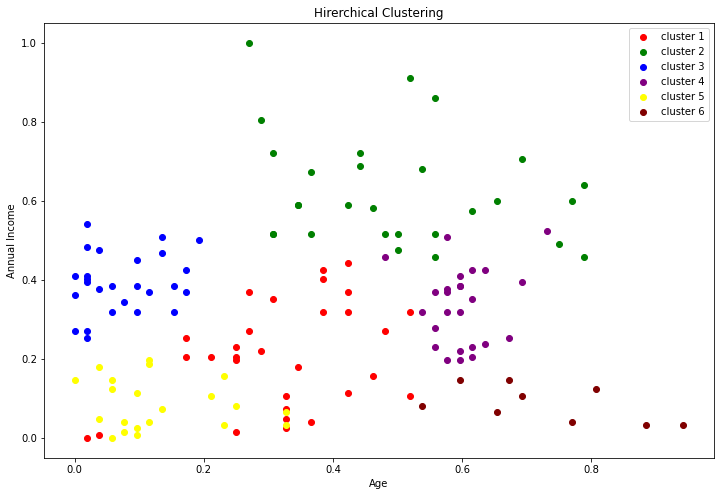

In [81]:
# Hierarchical clusters scatter plot
df1 = customer_data[customer_data['hierarchical_cluster']==0]
df2 = customer_data[customer_data['hierarchical_cluster']==1]
df3 = customer_data[customer_data['hierarchical_cluster']==2]
df4 = customer_data[customer_data['hierarchical_cluster']==3]
df5 = customer_data[customer_data['hierarchical_cluster']==4]
df6 = customer_data[customer_data['hierarchical_cluster']==5]

plt.figure(figsize=(12,8))
plt.scatter(df1.Age, df1['Annual Income (k$)'], color='Red', label='cluster 1')
plt.scatter(df2.Age, df2['Annual Income (k$)'], color='Green', label='cluster 2')
plt.scatter(df3.Age, df3['Annual Income (k$)'], color='Blue', label='cluster 3')
plt.scatter(df4.Age, df4['Annual Income (k$)'], color='purple', label='cluster 4')
plt.scatter(df5.Age, df5['Annual Income (k$)'], color='yellow', label='cluster 5')
plt.scatter(df6.Age, df6['Annual Income (k$)'], color='maroon', label='cluster 6')

plt.title('Hirerchical Clustering')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

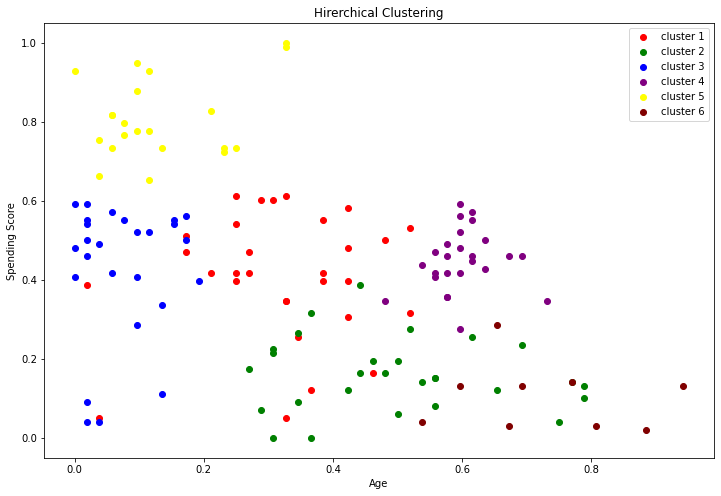

In [83]:
df1 = customer_data[customer_data['hierarchical_cluster']==0]
df2 = customer_data[customer_data['hierarchical_cluster']==1]
df3 = customer_data[customer_data['hierarchical_cluster']==2]
df4 = customer_data[customer_data['hierarchical_cluster']==3]
df5 = customer_data[customer_data['hierarchical_cluster']==4]
df6 = customer_data[customer_data['hierarchical_cluster']==5]

plt.figure(figsize=(12,8))
plt.scatter(df1.Age, df1['Spending Score (1-100)'], color='Red', label='cluster 1')
plt.scatter(df2.Age, df2['Spending Score (1-100)'], color='Green', label='cluster 2')
plt.scatter(df3.Age, df3['Spending Score (1-100)'], color='Blue', label='cluster 3')
plt.scatter(df4.Age, df4['Spending Score (1-100)'], color='purple', label='cluster 4')
plt.scatter(df5.Age, df5['Spending Score (1-100)'], color='yellow', label='cluster 5')
plt.scatter(df6.Age, df6['Spending Score (1-100)'], color='maroon', label='cluster 6')

plt.title('Hirerchical Clustering')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()